In [22]:
# Autoreload all modules
%load_ext autoreload
%autoreload 2

import jax
jax.config.update("jax_enable_x64", True)

import numpy as np
import jax.numpy as jnp
import jax.random as jr
import pylab as plt

# add ../mcjax to the path
import sys
sys.path.append('../../')

from mcjax.proba.log_gauss_pines import LGCP



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
# initialize jax RNG
key = jr.key(0)

In [24]:
dist_LGCP = LGCP.create(grid_dim=40)
print(f"Dimension: {dist_LGCP.dim}")
params = dist_LGCP.init_params()


Dimension: 1600


In [26]:
# compute laplace approximation
laplace_approx = dist_LGCP.laplace_approximation()

In [27]:
mu_laplace = laplace_approx["mu"]
cov_laplace = laplace_approx["cov"]

Text(0.5, 1.0, 'Marginal standard deviation of Cox process intensity')

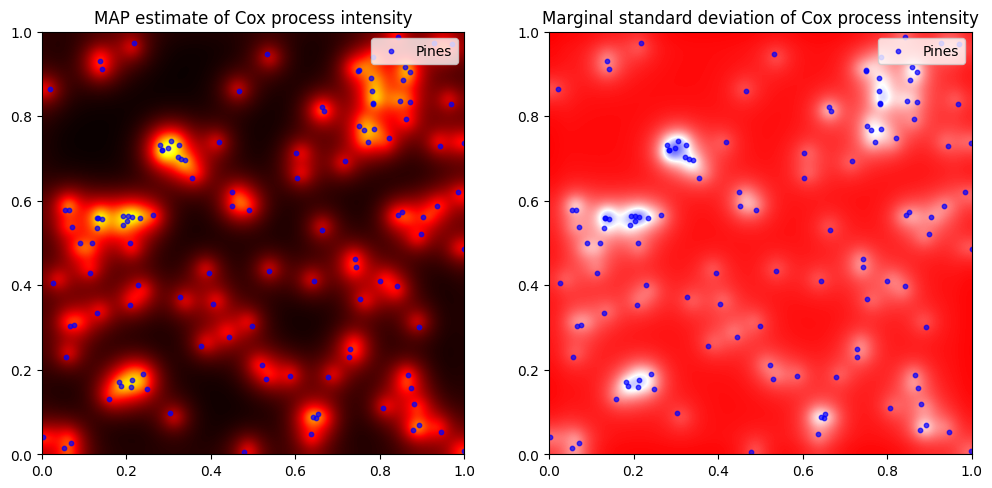

In [41]:
grid_dim = np.sqrt(dist_LGCP.dim).astype(int)
x_map_grid = mu_laplace.reshape(grid_dim, grid_dim)
marginal_std = np.sqrt(np.diag(cov_laplace)).reshape(grid_dim, grid_dim)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(x_map_grid, cmap='hot', interpolation='bicubic', extent=[0, 1, 0, 1], origin='lower')
# superpose the data
pines_locations = dist_LGCP.pines_points
plt.scatter(pines_locations[:, 1], pines_locations[:, 0],
            color='blue', marker="o", s=10, alpha=0.7,
            label='Pines')
plt.legend(loc='upper right')
plt.title('MAP estimate of Cox process intensity')


plt.subplot(1, 2, 2)
plt.imshow(marginal_std, cmap='bwr', interpolation='bicubic', extent=[0, 1, 0, 1], origin='lower')
# superpose the data
pines_locations = dist_LGCP.pines_points
plt.scatter(pines_locations[:, 1], pines_locations[:, 0],
            color='blue', marker="o", s=10, alpha=0.7,
            label='Pines')
plt.legend(loc='upper right')
plt.title('Marginal standard deviation of Cox process intensity')